In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date).first()
recent_date

('2010-01-01',)

In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores

yearly_precipitation = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2010-01-01").\
    filter(Measurement.date <= "2011-01-01").all()

In [20]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(yearly_precipitation, columns = ['date', 'precipitation'])
df.set_index('date', inplace = True)

In [21]:
# Sort the dataframe by date
df = df.sort_values(by='date')
df.head()

,precipitation
date,
2010-01-01,0.08
2010-01-01,0.21
2010-01-01,0.15
2010-01-01,0.15
2010-01-01,0.05


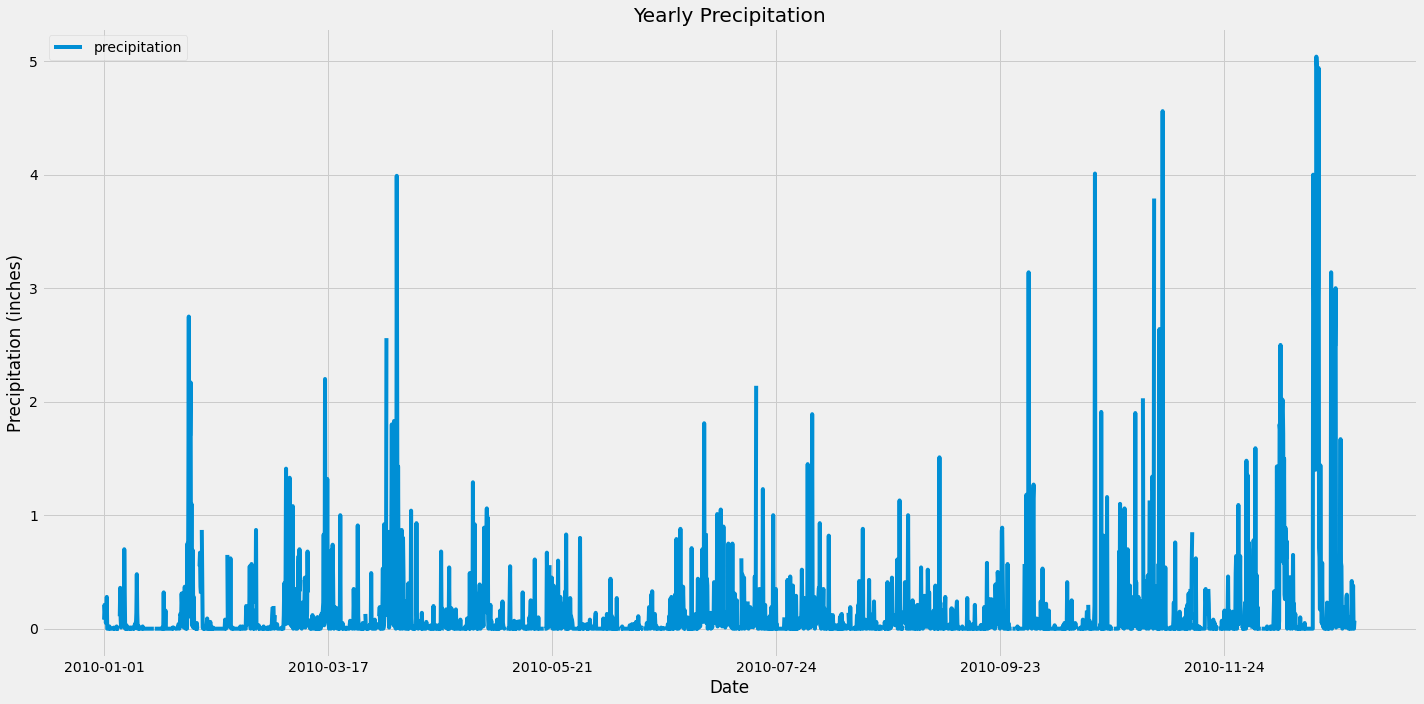

<Figure size 432x288 with 0 Axes>

In [25]:
# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots(figsize = (20, 10))
df.plot(ax = ax, x_compat = True)

ax.set_xlabel('Date')
ax.set_ylabel('Precipitation (inches)')
ax.set_title("Yearly Precipitation")
plt.tight_layout()
plt.show()

plt.savefig("Precipitation.png")

In [26]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2688.000000
mean,0.138549
std,0.411545
min,0.000000
25%,0.000000
50%,0.010000
75%,0.090000
max,5.040000


# Exploratory Station Analysis

In [28]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(Station.id).distinct().count()
total_stations

9

In [31]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_stations= session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [32]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = 'USC00519281'
temperatures = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station).all()
temperatures

[(54.0, 85.0, 71.66378066378067)]

In [53]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
yearly_temperatures = session.query(Measurement.date, Measurement.tobs).\
filter(Measurement.station == "USC00519281").filter(Measurement.date >="2016-08-23").filter(Measurement.date <="2017-08-23").\
all()


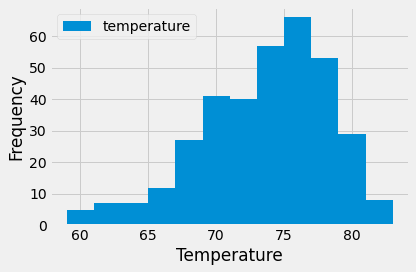

<Figure size 432x288 with 0 Axes>

In [54]:
df = pd.DataFrame(yearly_temperatures, columns = ['date', 'temperature'])

fig, ax = plt.subplots()
df.plot.hist(bins = 12, ax = ax)

ax.set_xlabel('Temperature')
ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

plt.savefig("Yearly_Plot.png")


# Close session

In [55]:
# Close Session
session.close()